In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

## Parte 1

1. Genere un conjunto de datos utilizando la función make_classification de sklearn.

In [3]:
X, y = make_classification(n_samples=100, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           random_state=0)

2. Usamos dos características para que podamos visualizar nuestros datos. Haz un diagrama de dispersión con la primera característica en el eje horizontal y la segunda en el eje vertical. Representa las dos categorías usando diferentes colores o diferentes símbolos.

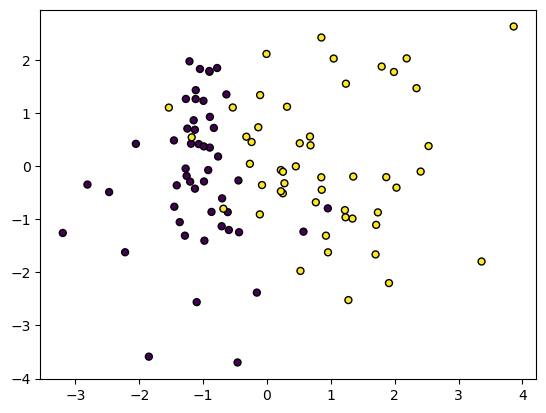

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c= y, s=25, edgecolor='k')
plt.show()

3. Con solo echar un vistazo, haga una estimación para un límite de decisión de la forma x_2 = m*x_1 + b. (Tenga en cuenta que aún no hemos ajustado una regresión logística a esto, pero si lo hiciéramos, la línea de constante p = 0.5 tiene m = -beta_1 / beta_2 y b = -beta_0 / beta_2).

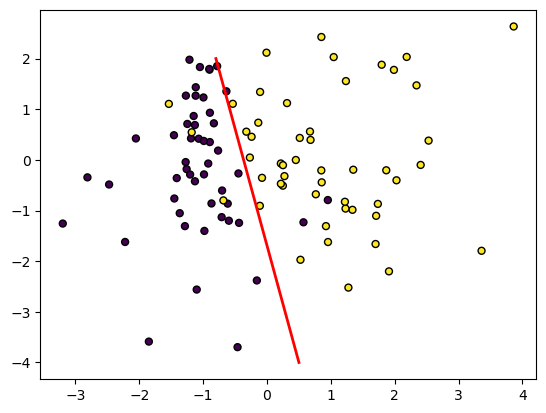

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c= y, s=25, edgecolor='k')
plt.plot([-0.8, 0.5], [2, -4], color='r', linestyle='-', linewidth=2)
plt.show()


## Parte 2

1. Para verificar que sus implementaciones sean correctas, calcule lo siguiente.

In [6]:
import numpy as np
X = np.array([[0, 1], [2, 2], [3, 0]])
y = np.array([1, 0, 0])

i. Usando los datos anteriores, calcule el valor de la función de costo. Inicializa tus coeficientes: β1 =1, β2 =1. Por ahora, suponga que β0=0 (es decir, no estamos considerando un término de intersección).

    Sugerencia: utilizará (β1x1,1 + β2x1,2) mientras calcula su función de hipótesis para el primer punto de datos.

In [7]:
coeffs = np.array([1, 1])
m=len(X)
hipotesis = 1.0 / (1.0 + np.exp((-1) *np.dot(X, coeffs)))
costo = (-1)*np.sum((y*np.log(hipotesis)) + ((1-y)*np.log(1-hipotesis))) / m
costo

2.4599996556699257

ii. Usando los datos anteriores, calcule el gradiente de la función de costo.

In [8]:
gradiente = np.dot(X.transpose(), (hipotesis-y))/m
gradiente

array([1.60724999, 0.56502872])

En logistic_regression_functions.py, implemente las funciones predict_proba y predict. predict_proba estas calcularan el resultado de h(x) para los coeficientes dados. Esto devuelve valores flotantes entre 0 y 1, que deben interpretarse como probabilidades condicionales. predict redondeará estos valores para que obtenga una predicción de 0 o 1. Se proporciona un argumento opcional para el umbral, cuyo valor predeterminado es 0,5. Nota: Los nombres de estas funciones se eligieron para alinearse con las convenciones de sklearn.

In [9]:
def predict_proba(X, coeffs):
    probabilidades = 1.0 / (1.0 + np.exp((-1) *np.dot(X, coeffs)))
    return probabilidades

def predict(X, coeffs, thresh=0.5):
    probabilidades = predict_proba(X, coeffs)
    pronostico = []
    for i in probabilidades:
        if i > thresh:
            pronostico.append(1)
        else:
            pronostico.append(0)
    return pronostico

En logistic_regression_functions.py, implemente el costo y el gradiente. Debería poder usar la función predict_proba que implementó anteriormente. Asegúrese de verificar que obtiene los mismos valores que calculó anteriormente.

In [10]:
def cost(X, y, coeffs):
    m=len(X)
    hipotesis = 1.0 / (1.0 + np.exp((-1) *np.dot(X, coeffs)))
    costo = (-1)*np.sum((y*np.log(hipotesis)) + ((1-y)*np.log(1-hipotesis))) / m
    return costo

def gradient(X, y, coeffs):
    gradiente = np.dot(X.transpose(), (hipotesis-y))/m
    return gradiente

In [11]:
costo = cost(X,y,coeffs)
print('El costo es: ', costo)
gradiente = gradient(X, y, coeffs)
print('El gradiente es: ',gradiente)
probabilidades = predict_proba(X,coeffs)
print('Las probabilidades son: ', probabilidades)
pronostico = predict(X, coeffs, thresh=0.5)
print('Los valores pronosticados son: ', pronostico)

El costo es:  2.4599996556699257
El gradiente es:  [1.60724999 0.56502872]
Las probabilidades son:  [0.73105858 0.98201379 0.95257413]
Los valores pronosticados son:  [1, 1, 1]


Gradient Descent:
    input: J: función diferencial (función de optimización)
           α: tasa de aprendizaje
           k: numberero de iteraciones
    output: maximo local de la función de optimización J      

    inicializar β (all 0's)
    repetir para k iteraciones:
        β <- β - α * gradient(J)

1. Comience echando un vistazo al código de inicio. Observe cómo se inicializa el objeto GradientDescent. Se necesita una función de costo y una función de gradiente. Le pasaremos las funciones que escribimos arriba. Aquí hay un código de ejemplo de cómo podremos ejecutar el código de Gradient Descent una vez que haya completado todas las funciones.

In [12]:
def GradientDescent(x, y, alpha=0.01, numIteraciones=10000):
    J_history = np.zeros(shape=(numIteraciones, 1))
    xTrans = x.transpose()
    for i in range(0, numIteraciones):
        # inicializar betas (all 0's)
        coeffs = np.array([0, 0])
        m=len(X)
        costo = cost(x,y,coeffs)
        gradiente = np.dot(xTrans, (hipotesis-y)) / m
        # repetir para k iteraciones
        coeffs = coeffs - alpha * gradiente
        J_history[i][0] = costo
    return coeffs

2. Implementar el método de ajuste. Siga el pseudocódigo de arriba.

In [13]:
coeffs = GradientDescent(X,y)

In [14]:
probabilidades = predict_proba(X,coeffs)
probabilidades

array([0.49858743, 0.48914031, 0.48794796])

3. Implemente el método de predicción. Simplemente, debería llamar a la función predict_func que se tomó como parámetro.

In [15]:
pronostico = predict(X, coeffs, thresh=0.5)
print('Los valores pronosticados son: ', pronostico)

Los valores pronosticados son:  [0, 0, 0]
